In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [2]:
games = pd.read_csv('dataForDataFest/games.csv')
gps = pd.read_csv('dataForDataFest/gps.csv')
rpe = pd.read_csv('dataForDataFest/rpe.csv')
well = pd.read_csv('dataForDataFest/wellness.csv')

In [3]:
playerIndex = ((gps['PlayerID'] == 2) & (gps['GameID'] == 1))
player2Time = gps['Time'][playerIndex]
time = np.arange(0,player2Time.size)
player2Speed = gps['Speed'][playerIndex]
player2Load = gps['AccelLoad'][playerIndex]
player2Imp = gps['AccelImpulse'][playerIndex]

speedNorm = player2Speed/np.max(player2Speed)
loadNorm = player2Load/np.max(player2Load)
impNorm = player2Imp/np.max(player2Imp)

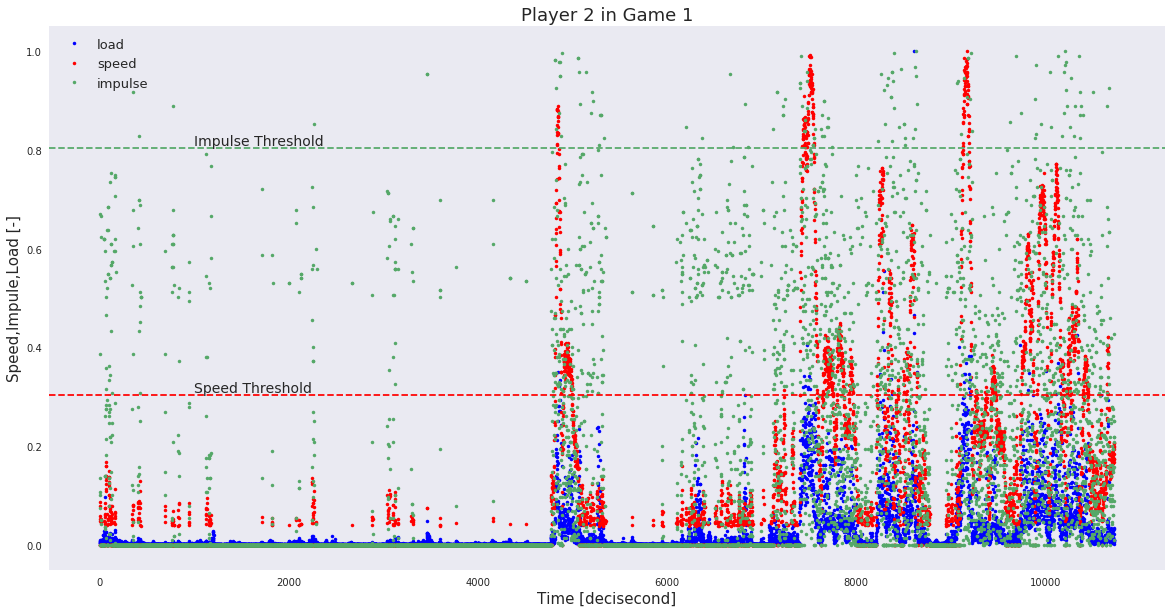

In [82]:
mpl.style.use('seaborn')

fig = plt.figure(figsize=(20,10))
plt.plot(time,loadNorm,'b.',label='load')
plt.plot(time,speedNorm,'r.',label='speed')
plt.plot(time,impNorm,'C1.', label='impulse')
plt.axhline(y=4.80/np.max(player2Imp),color='C1',linestyle='--')
plt.axhline(y=2.311/np.max(player2Speed),color='r',linestyle='--')
plt.text(x=1000,y=.31,s='Speed Threshold',fontsize=14)
plt.text(x=1000,y=.81,s='Impulse Threshold',fontsize=14)
plt.title('Player 2 in Game 1',fontsize=18)
plt.xlabel('Time [decisecond]',fontsize=15)
plt.ylabel('Speed,Impule,Load [-]',fontsize=15)
plt.grid()
plt.legend(fontsize=13)

fig.savefig('player2Game1.png')

In [114]:
wellnessOffDays = []
trainingOffDays = []
for i in tournyDates:
    currentIndex = ((well['Date'] > i[0]) & (well['Date'] < i[1]))
    wellnessOffDays.append(well[currentIndex])
    currentIndex = ((rpe['Date'] > i[0]) & (rpe['Date'] < i[1]))
    trainingOffDays.append(rpe[currentIndex])

In [27]:
hits = pd.read_csv('offDayTraining/hitsByDate.csv')
hits = hits.transpose()

In [28]:
tourneyHits = []
tourneySize = [2,3,5,2,3,2]
tourneyIndex = [1,3,6,11,13,16]

for i in hits:
    a = np.zeros(len(tourneySize))
    for j in range(0,a.size):
        for k in range(0,tourneySize[j]):
            a[j] += hits[i][k+tourneyIndex[j]]
    tourneyHits.append(a)
    
for i in tourneyHits:
    maxVal = np.max(i)
    for j in range(0,i.size):
        i[j] = i[j]/maxVal

In [131]:
well0 = pd.read_csv('offDayTraining/0rpe.csv')
well1 = pd.read_csv('offDayTraining/1rpe.csv')
well2 = pd.read_csv('offDayTraining/2rpe.csv')
well3 = pd.read_csv('offDayTraining/3rpe.csv')
well4 = pd.read_csv('offDayTraining/4rpe.csv')

In [134]:
scores = ['AcuteLoad','DailyLoad','ChronicLoad']

In [135]:
players = well0['PlayerID'].unique()

lvPlayers = []
for j in range(0,players.size):
    lvPlayers.append(well0['PlayerID'] == players[j])

meanScores0 = []   
for i in lvPlayers:
    currentIndex = well0[i]
    a = []
    for j in range(0,len(scores)):
        a.append(np.mean(currentIndex[scores[j]])/np.max(currentIndex[scores[j]]))
        
    meanScores0.append(a)

In [136]:
lvPlayers = []
for j in range(0,players.size):
    lvPlayers.append(well1['PlayerID'] == players[j])

meanScores1 = []   
for i in lvPlayers:
    currentIndex = well1[i]
    a = []
    for j in range(0,len(scores)):
        a.append(np.mean(currentIndex[scores[j]])/np.max(currentIndex[scores[j]]))
        
    meanScores1.append(a)

In [137]:
lvPlayers = []
for j in range(0,players.size):
    lvPlayers.append(well2['PlayerID'] == players[j])

meanScores2 = []   
for i in lvPlayers:
    currentIndex = well2[i]
    a = []
    for j in range(0,len(scores)):
        a.append(np.mean(currentIndex[scores[j]])/np.max(currentIndex[scores[j]]))
        
    meanScores2.append(a)

In [138]:
lvPlayers = []
for j in range(0,players.size):
    lvPlayers.append(well3['PlayerID'] == players[j])

meanScores3 = []   
for i in lvPlayers:
    currentIndex = well3[i]
    a = []
    for j in range(0,len(scores)):
        a.append(np.mean(currentIndex[scores[j]])/np.max(currentIndex[scores[j]]))
        
    meanScores3.append(a)

In [139]:
lvPlayers = []
for j in range(0,players.size):
    lvPlayers.append(well4['PlayerID'] == players[j])

meanScores4 = []   
for i in lvPlayers:
    currentIndex = well4[i]
    a = []
    for j in range(0,len(scores)):
        a.append(np.mean(currentIndex[scores[j]])/np.max(currentIndex[scores[j]]))
        
    meanScores4.append(a)

In [140]:
# scores = ['Fatigue','Soreness','Desire','Irritability','SleepHours']
# scores = ['AcuteLoad','DailyLoad','ChronicLoad']
a = {}
for i in range(0,17):
    b = {}
    for j in scores:
        if j == 'Fatigue':
            b[j] = [meanScores0[i][0],
                    meanScores1[i][0],
                    meanScores2[i][0],
                    meanScores3[i][0],
                    meanScores4[i][0]]
        elif j == 'Soreness':
            b[j] = [meanScores0[i][1],
                    meanScores1[i][1],
                    meanScores2[i][1],
                    meanScores3[i][1],
                    meanScores4[i][1]]
        elif j == 'Desire':
            b[j] = [meanScores0[i][2],
                    meanScores1[i][2],
                    meanScores2[i][2],
                    meanScores3[i][2],
                    meanScores4[i][2]]
        elif j == 'Irritability':
            b[j] = [meanScores0[i][3],
                    meanScores1[i][3],
                    meanScores2[i][3],
                    meanScores3[i][3],
                    meanScores4[i][3]]
        elif j == 'SleepQuality':
            b[j] = [meanScores0[i][4],
                    meanScores1[i][4],
                    meanScores2[i][4],
                    meanScores3[i][4],
                    meanScores4[i][4]]
    a[i] = b

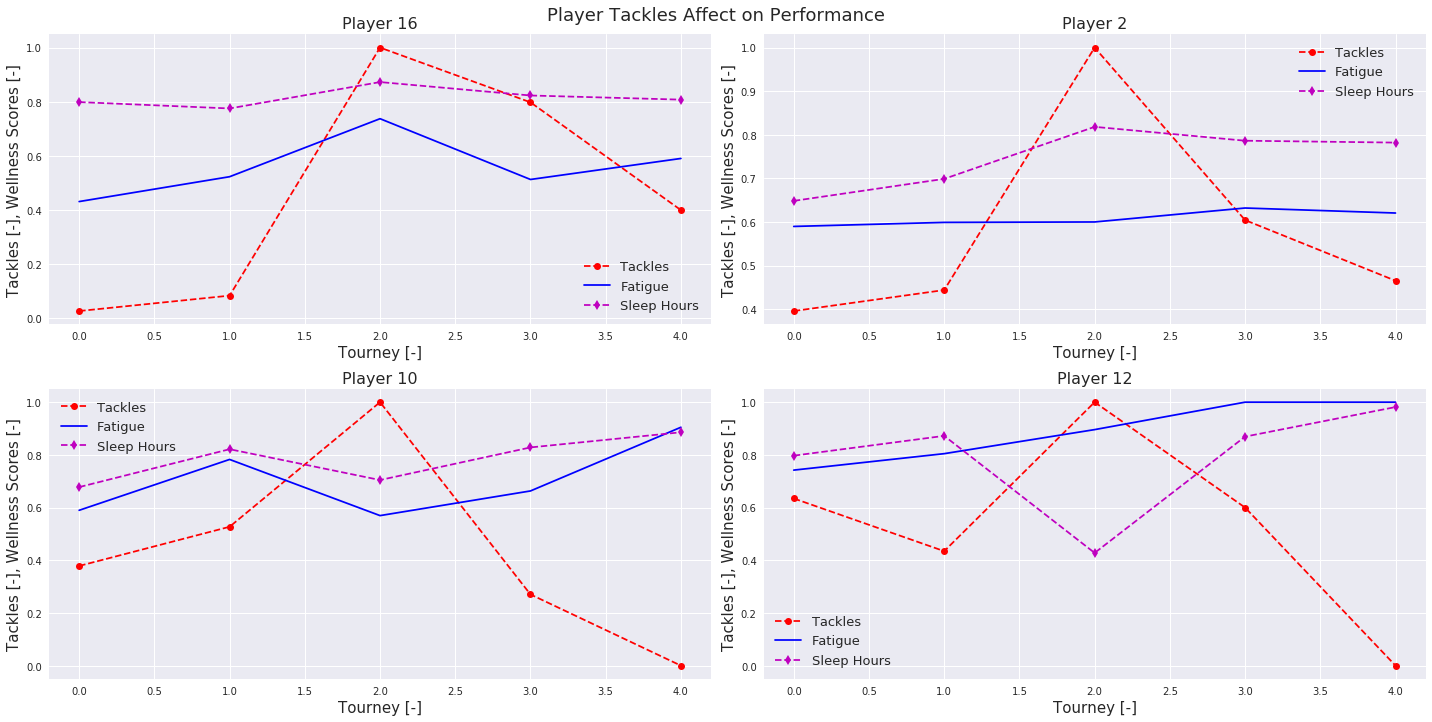

In [81]:
fig2,((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(20,10))
fig2.suptitle('Player Tackles Affect on Performance',fontsize=18,y=.999)

i = 15
ax1.plot(tourneyHits[i][0:5],'r--o',label='Tackles')
ax1.plot(a[i]['Fatigue'],'b',label='Fatigue')
ax1.plot(a[i]['SleepHours'],'m--d',label='Sleep Hours')
ax1.set_xlabel('Tourney [-]',fontsize=15)
ax1.set_ylabel('Tackles [-], Wellness Scores [-]',fontsize=15)
ax1.set_title('Player '+ str(i+1),fontsize=16)
ax1.legend(fontsize=13)

i = 1
ax2.plot(tourneyHits[i][0:5],'r--o',label='Tackles')
ax2.plot(a[i]['Fatigue'],'b',label='Fatigue')
ax2.plot(a[i]['SleepHours'],'m--d',label='Sleep Hours')
ax2.set_xlabel('Tourney [-]',fontsize=15)
ax2.set_ylabel('Tackles [-], Wellness Scores [-]',fontsize=15)
ax2.set_title('Player '+ str(i+1),fontsize=16)
ax2.legend(fontsize=13)

i = 9
ax3.plot(tourneyHits[i][0:5],'r--o',label='Tackles')
ax3.plot(a[i]['Fatigue'],'b',label='Fatigue')
ax3.plot(a[i]['SleepHours'],'m--d',label='Sleep Hours')
ax3.set_xlabel('Tourney [-]',fontsize=15)
ax3.set_ylabel('Tackles [-], Wellness Scores [-]',fontsize=15)
ax3.set_title('Player '+ str(i+1),fontsize=16)
ax3.legend(fontsize=13)

i = 11
ax4.plot(tourneyHits[i][0:5],'r--o',label='Tackles')
ax4.plot(a[i]['Fatigue'],'b',label='Fatigue')
ax4.plot(a[i]['SleepHours'],'m--d',label='Sleep Hours')
ax4.set_xlabel('Tourney [-]',fontsize=15)
ax4.set_ylabel('Tackles [-], Wellness Scores [-]',fontsize=15)
ax4.set_title('Player '+ str(i+1),fontsize=16)
ax4.legend(fontsize=13)

plt.tight_layout()

fig2.savefig('playerPerformance.png')

In [143]:
# scores = ['AcuteLoad','DailyLoad','ChronicLoad']
values = []
for i in range(0,17):
    for j in range(0,5):
        x = tourneyHits[i][j]
        y = a[i]['ChronicLoad'][j]
        values.append([x,y])
    
df = pd.DataFrame(values)
df.to_csv('tourneyHitsChronic.csv')